<a href="https://colab.research.google.com/github/micheletempos/MVP-Analise-de-Dados-PUC/blob/main/PreProcessamento_MVP_PUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Definição do Problema

O conjunto de dados utilizado neste projeto é o Heart Disease Dataset, cujo arquivo está disponível para download e consulta no Kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). É um dataset de Aprendizado Supervisionado, especificamente de Classificação.

Datado de 1988, este dataset compreende quatro bases de dados: Cleveland, Hungria, Suíça e Long Beach V. Inicialmente composto por 76 atributos, incluindo o atributo de previsão. Os experimentos publicados, no entanto, se concentram no uso de um subconjunto contendo 14 atributos.

Desse modo, o conjunto de dados em questão engloba 14 atributos que abrangem informações relevantes à saúde dos indivíduos, tais como idade, sexo, pressão arterial, colesterol, níveis de glicose, histórico familiar, entre outros. O propósito principal é utilizar esses dados para identificar padrões e prever a presença ou risco de doenças cardíacas em um paciente.

O campo "target" refere-se à presença de doença cardíaca no paciente, sendo representado por um número inteiro, onde 0 indica a ausência de doença e 1 indica a presença de doença.


**Informações sobre os atributos:**


1. **age** - idade
2. **sex** = variável categórica de gênero sedo 1=masculino, 0=feminino
3. **cp** = variável categórica de tipo de dor no peito
    * valor 1: angina típica,
    * valor 2: angina atípica,
    * valor 3:dor não anginosa, 4: assintomático
4. **trestbps** = pressão arterial em repouso (em mm Hg na admissão ao hospital)
5. **chol** = colesterol sérico em mg/dl
6. **fbs** = glicemia em jejum > 120 mg/dl
    * Valor 1:  verdadeiro;
    * Valor 0:  falso
7. **restecg** =
    * 0: normal;
    * 1: ter anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV ;
    * 2: mostrando hipertrofia ventricular esquerda provável ou definitiva por "Estes'" critérios
8. **thalach** = frequência cardíaca máxima alcançada
9. **exang** = angina induzida por exercício (1: sim ; 0: não)
10. **oldpeak** = Depressão do segmento ST induzida por exercício em relação ao repouso
11. **slope** = a inclinação do pico do segmento ST do exercício
    * Valor 1: inclinação ascendente
    * Valor 2: plano
    * Valor 3: descida
12. **ca**: número de vasos principais (0-3) coloridos por fluorosopia
13. **thal**: doença sanguínea chamada talassemia Valor
    * Valor 0: NULL
    * Valor 1: defeito fixo (sem fluxo sanguíneo em alguma parte do coração)
    * Valor 2: fluxo sanguíneo normal
    * Valor 3: defeito reversível (observa-se fluxo sanguíneo, mas não é normal)

obs.: Informações complementares também foram obtidas pela publicação original, via link: https://archive.ics.uci.edu/dataset/45/heart+disease

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv
Com o dataset carregado, iremos explorá-lo um pouco

In [3]:
# Carrega arquivo csv usando Pandas e indicando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/micheletempos/MVP-Analise-de-Dados-PUC/main/heart.csv"


# carga do dataset citando a variavel url
df_origem = pd.read_csv(url, delimiter=',')

In [4]:
# visualizando as 5 primeiras linhas do dataset para validar a carga
df_origem.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# visualizando as 5 últimas linhas do dataset
df_origem.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# Criando uma cópia do Dataset
# O dataset original não será usado nos processos seguintes
df = df_origem.copy()

In [7]:
# Substituindo a variável categórica da coluna 'sex'
df['sex'] = df['sex'].replace({1: 'Masculino', 0: 'Feminino'})

Anteriormente, a coluna 'sex' era caracterizada por valores numéricos, onde 1 representava homens e 0 representava mulheres. Para propósitos de estudo, foi realizada uma conversão desses valores quantitativos discretos (1;0) para valores qualitativos nominais, utilizando as categorias 'Masculino' e 'Feminino'.

In [8]:
#Visualizando os valores iniciais e finais do dataset, após alteração
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Masculino,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Masculino,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Masculino,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Masculino,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Feminino,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Masculino,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,Masculino,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,Masculino,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,Feminino,0,110,254,0,0,159,0,0.0,2,0,2,1


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Neste ponto, serão analisadas as dimensões do dataset e suas informações, com alguns exemplos de linhas.

In [9]:
# Dimensões do dataset
# O Dataset é composto de 1025 linhas e 14 colunas, isto é comprovado pela instrução print(base.shape)
print(df.shape)

(1025, 14)


In [10]:
# exibindo os nomes das colunas
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
# exibindo a quantidade de linhas por coluna
df.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [12]:
# Verificando se a classe de saída está desbalanceada
df.groupby('target').size()

target
0    499
1    526
dtype: int64

A soma total de resultados é 449 + 526 = 975.
* Proporção da Classe 0: 449 / 975 ≈ 0.46 (aproximadamente 46%)
* Proporção da Classe 1: 526 / 975 ≈ 0.54 (aproximadamente 54%)
Embora as proporções não sejam exatamente iguais, a diferença é relativamente pequena. Pode-se dizer que as classes estão razoavelmente equilibradas, mas a sensibilidade à proporção de classes pode depender do algoritmo de machine learning específico que será utilizado.

Um exemplo de classe desbalanceada, seria a seguinte contagem:
* Proporção da Classe 0: 149 / 975 ≈ 0.15 (aproximadamente 15%)
* Proporção da Classe 1: 826 / 975 ≈ 0.84 (aproximadamente 84%)
Isso poderia resultar em avaliações enganosas ou viés no modelo.


Como Lidar com Classes Desbalanceadas:

* <i>Resampling</i>: Subamostragem (undersampling) da classe majoritária ou superamostragem (oversampling) da classe minoritária para equilibrar as classes.

* <i>Ponderação de Classes</i>: Alguns algoritmos permitem atribuir pesos diferentes às classes, dando mais importância à classe minoritária.

* <i>Geração Sintética de Dados</i>: Utilização de técnicas como SMOTE (Synthetic Minority Over-sampling Technique) para gerar dados sintéticos da classe minoritária.

In [13]:
# informações do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


Através do base.info( ), identificou-se:
* **valores nulos**: todas as colunas estão com dados preenchidos na totalidade (1025), entretando, necessitarão de análises mais aprofundadas para ter certeza se são ou não missing
* **tipos de dados**: há presença de strings(object), valores númericos do tipo inteiro (int64) e decimais (float64)
* **uso de memória**:  é de 112.2 KB

In [14]:
# verificando os tipos de cada coluna do dataframe
df.dtypes

age           int64
sex          object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

outra maneira de verificar os tipos de dados das colunas, é utilizadno o .types

In [15]:
# verificando valores missing
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Conforme já citado, não há valores nulos, porém, a análise será aprimorada com o sumário estatístico, através do comando describe


In [16]:
# exibindo um sumário estatístico para atributos numéricos
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Com o método describe, podemos identificar as estatísticas descritivas das colunas numéricas.
Podemos analisar estatísticas de:
* Contagem de registros
* Média
* Desvio Padrão
* Valor Mínimo
* 1º Quartil (25%)
* 2º Quartil (50%)
* 3º Quartil (75%)
* Valor Máximo

**Agora, podemos observar alguns pontos de atenção**

*  Desvio padrão alto para os atributos:

    * **age** :        com 9.07
    * **trestbps** :   com 17.5
    * **chol** :       com 51.59
    * **thalach** :    com 51.59

Quando o padrão está alto, significa que os dados estão mais dispersos em relação à média, indicando uma maior variabilidade nos dados (distribuição mais ampla).
Quando há presença de desvio padrão alto em um conjunto de dados e está se preparando para aplicar técnicas de machine learning, algumas abordagens podem ser consideradas, como:

* Normalização ou Padronização
* Manuseio de Outliers
* entre outros...

No entanto, é importante considerar o contexto específico da situação ao interpretar o significado de um desvio padrão alto, pois diferentes áreas e tipos de dados podem ter diferentes expectativas em relação à variabilidade.

Um outro exemplo que podemos destacar é o "thal". No início deste estudo, nas informações de atributos, já foi citado que zero corresponde ao valor nulo, é um valor nulo (Valor 1: defeito fixo; Valor 2: fluxo sanguíneo normal; Valor 3: defeito reversível).
Sendo assim, caberá uma ação sobre esses valores zerados, que constam no atributo "Thal"

Para a identificão de possíveis outliers, podemos utilizar de visualizações unimodais, as quais poderão ser visualizadas em 3.2 Visualizações Unimodais.


In [17]:
# Análise de Correlação (tabela)
df_origem.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


### 3.2. Visualizações Unimodais

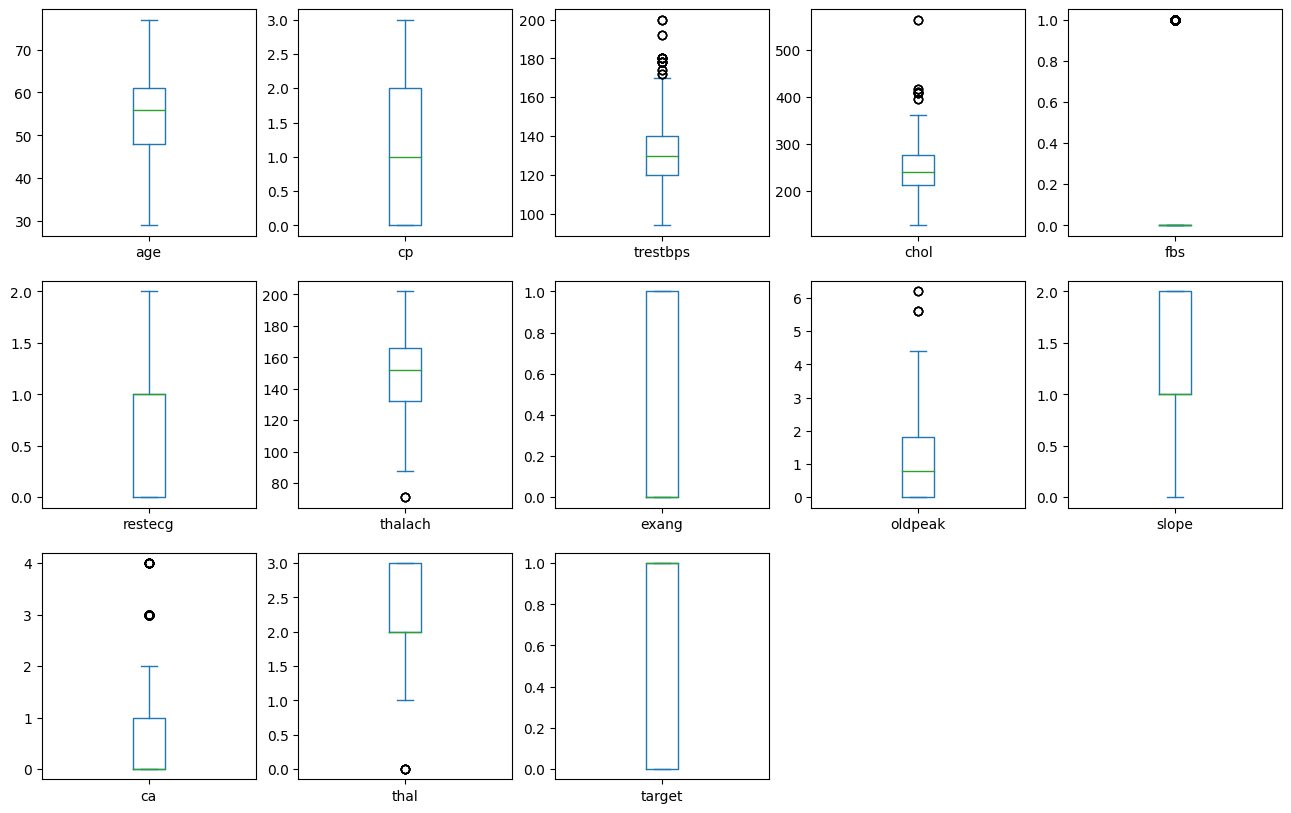

In [18]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,5),  sharex = False, sharey = False, figsize = (16,10))
plt.show()

Exemplos de intepretação para colunas e boxplot:

* **Age**: o box plot demonstra que os valores estão condizentes com os apresentados conforme o sumário estatístico
    * Não apresenta outliers
    * valor mínimo 29,
    * 1º quartil até 48
    * 2º quartil (mediana) 56
    * 3º quartil 61
    * valor máximo em 77.
    

* **Trestbps**
* Apresenta outliers acima do valor máximo. Com isso, o Boxplot consegue realizar os
    cálculos para identificar cada variável estatística, desconsiderando os outliers
    * valor mínimo 90,
    * 1º quartil até 120
    * 2º quartil (mediana) 130
    * 3º quartil 140
    * valor máximo em 170

Apenas para efeito ilustrativo, abaixo consta o cálculo realizado pelo Boxplot.
Neste exemplo, utilizou-se os valores da coluna trestbps

In [19]:
# Cálculo do 1º quartil
Q1 = df["trestbps"].quantile(0.25)

# Cálculo do 3º quartil
Q3 = df["trestbps"].quantile(0.75)

# Cálculo do intervalo interquartil
IQR = df["trestbps"].quantile(0.75) - df["trestbps"].quantile(0.25)

# Cálculos de valor máximo e mínimo
Valor_Maximo = Q3 + 1.5 * IQR
Valor_Minimo = Q1 - 1.5 * IQR

print("Valor máximo boxplot: ", Valor_Maximo)
print("Valor mínimo boxplot: ", Valor_Minimo)
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR Intervalo Interquartil: ", IQR)

Valor máximo boxplot:  170.0
Valor mínimo boxplot:  90.0
Q1:  120.0
Q3:  140.0
IQR Intervalo Interquartil:  20.0


In [20]:
# Outiliers para coluna trestbps (pressão arterial em repouso)
df[df["trestbps"]>170].count()

age         30
sex         30
cp          30
trestbps    30
chol        30
fbs         30
restecg     30
thalach     30
exang       30
oldpeak     30
slope       30
ca          30
thal        30
target      30
dtype: int64

Realizando um filtro, é possível verificar a existência de 30 registros acima do valor máximo

Apesar de apresentar registros de ouliers, nesse caso, não serão removidas as linhas, pois são valores possíveis de ocorrer.

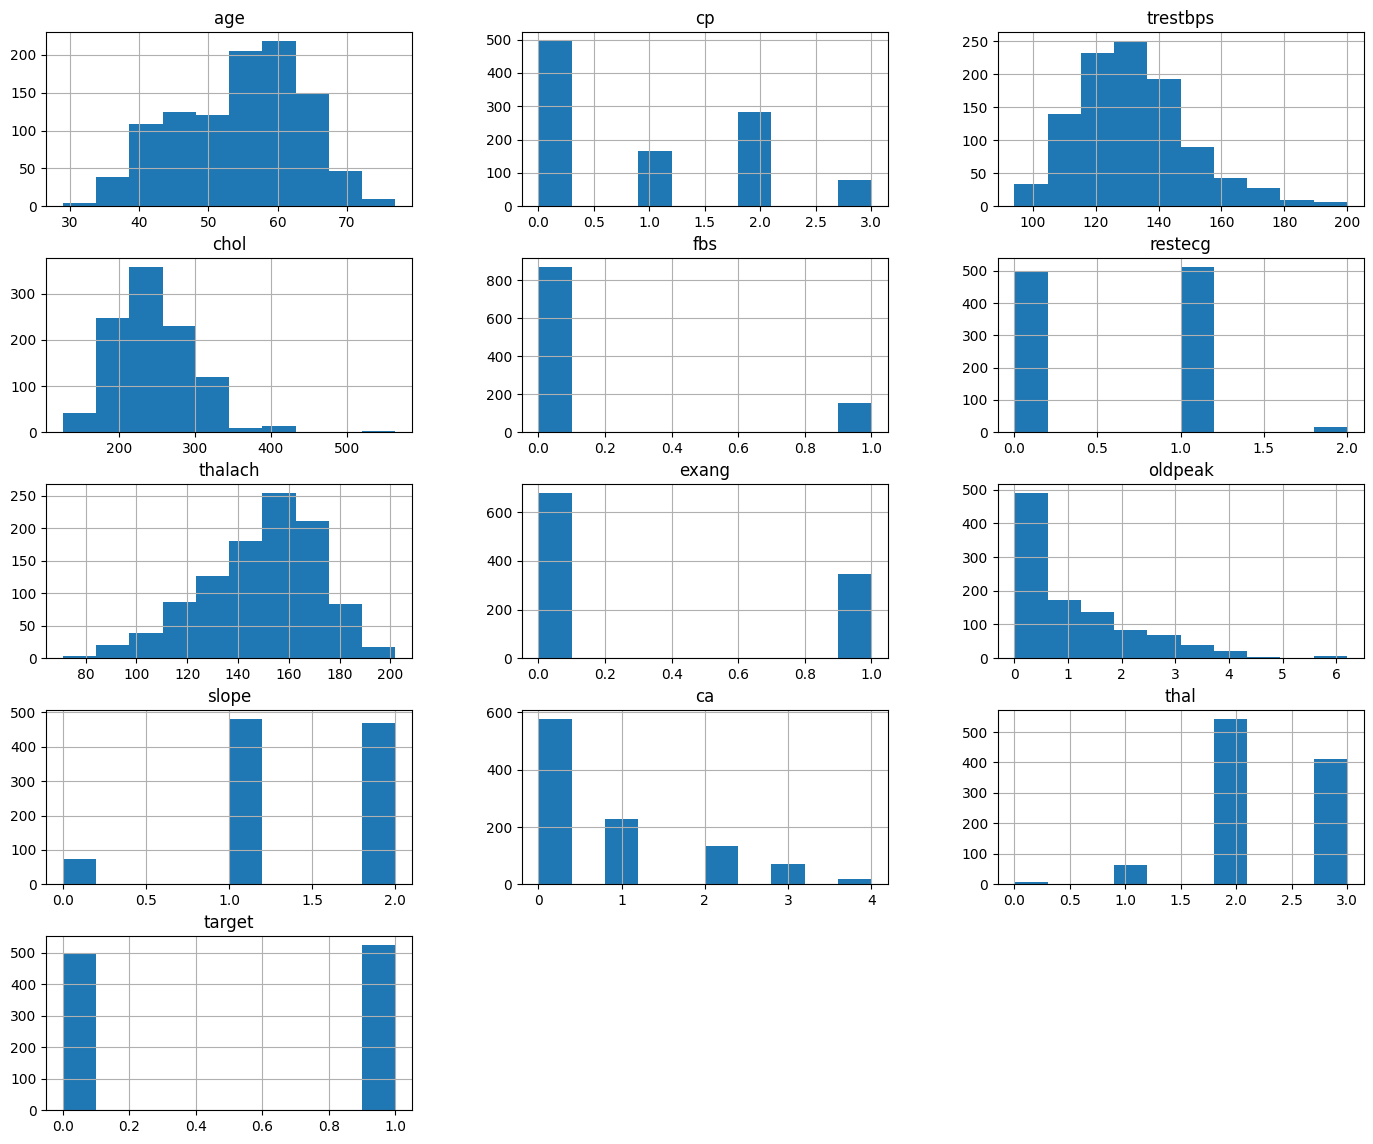

In [21]:
# Histograma
df.hist(figsize = (17,14),  layout = (5,3))
plt.show()

A partir dos gráfico de dispersão, podemos identificar, características dos dados, como: simetria da distribuição, centralidade, amplitude

Primeiro, podemos ver onde a maioria dos dados se agrupa, o que nos dá uma ideia do ponto central. Depois, olhamos para quão espalhados estão os dados, se estão todos juntos ou mais espalhados. Isso é o que chamamos de amplitude.

Além disso, ao observar o formato do gráfico, podemos perceber se os dados são mais ou menos simétricos, ou seja, se estão distribuídos igualmente dos dois lados do ponto central.

Como exemplo, vamos citar alguns atributos:

* restcg: Distribuição Bimodal, isto é, temos dois "picos" de concentração de dados simétricos

* Trestbps: Assimétrica à direita, isto é temos valor da média sendo maior que o valor da mediana

Conforme visto, o modelo sugere a aplicação de Normalização

In [22]:
# Exemplo de demonstração dos valores para  'trestbps'

# Média de trestbps
media_trestbps = df['trestbps'].mean()
print("A média é:", media_trestbps)

# Mediana de trestbps'
mediana_trestbps = df['trestbps'].median()
print("A Mediana é:", mediana_trestbps)

A média é: 131.61170731707318
A Mediana é: 130.0


Assim como temos os gráficos de Histograma, podemos utilizar os gráficos de densidade, para observar, de uma melhor forma,  as curvas assimétricas

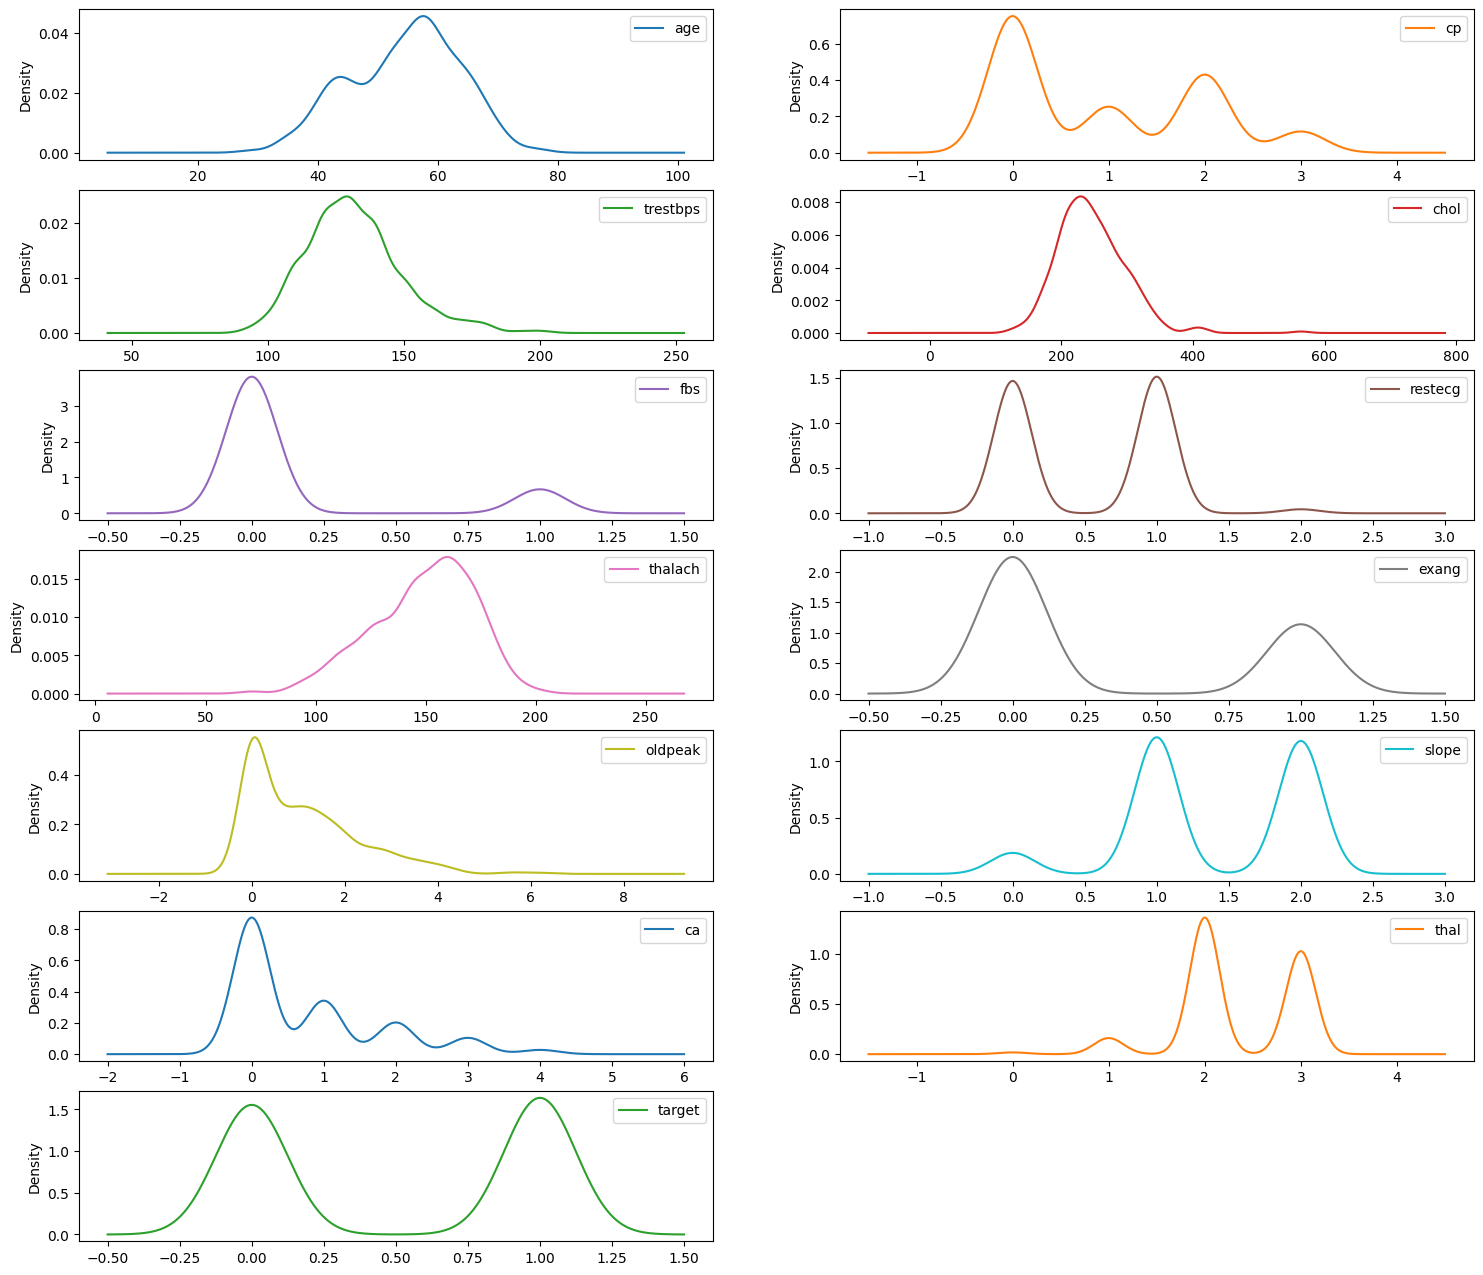

In [23]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (7,2), sharex = False, figsize = (18,16))
plt.show()

### 3.3. Visualizações Multimodais


A seguir, será apresentada a matriz de correlação, explorando a covariância entre variáveis numéricas, uma medida que reflete a relação entre elas. Utilizamos o coeficiente de correlação de Pearson, onde valores próximos de -1 ou +1 indicam correlação negativa ou positiva, respectivamente, e valores próximos de 0 indicam ausência de correlação.

Essa análise é crucial, pois algoritmos como regressão linear e logística podem enfrentar problemas de desempenho com atributos altamente correlacionados. Recomenda-se consultar a documentação do algoritmo para determinar se ajustes no conjunto de dados são necessários.

A importância da correlação entre atributos foi destacada previamente, e agora visualizamos essa informação por meio da matriz de correlação, proporcionando uma compreensão gráfica das relações entre os atributos numéricos.

O código subsequente exibe essa matriz para uma análise visual mais intuitiva das correlações.
Utilizou-se o dataframe original, apenas para demonstração, já que o gráfico não executa para valores com string (no caso a variável categórica 'sex'). Outra maneira, seria criar um novo dataframe, eliminando a coluna 'sex'.

<Axes: >

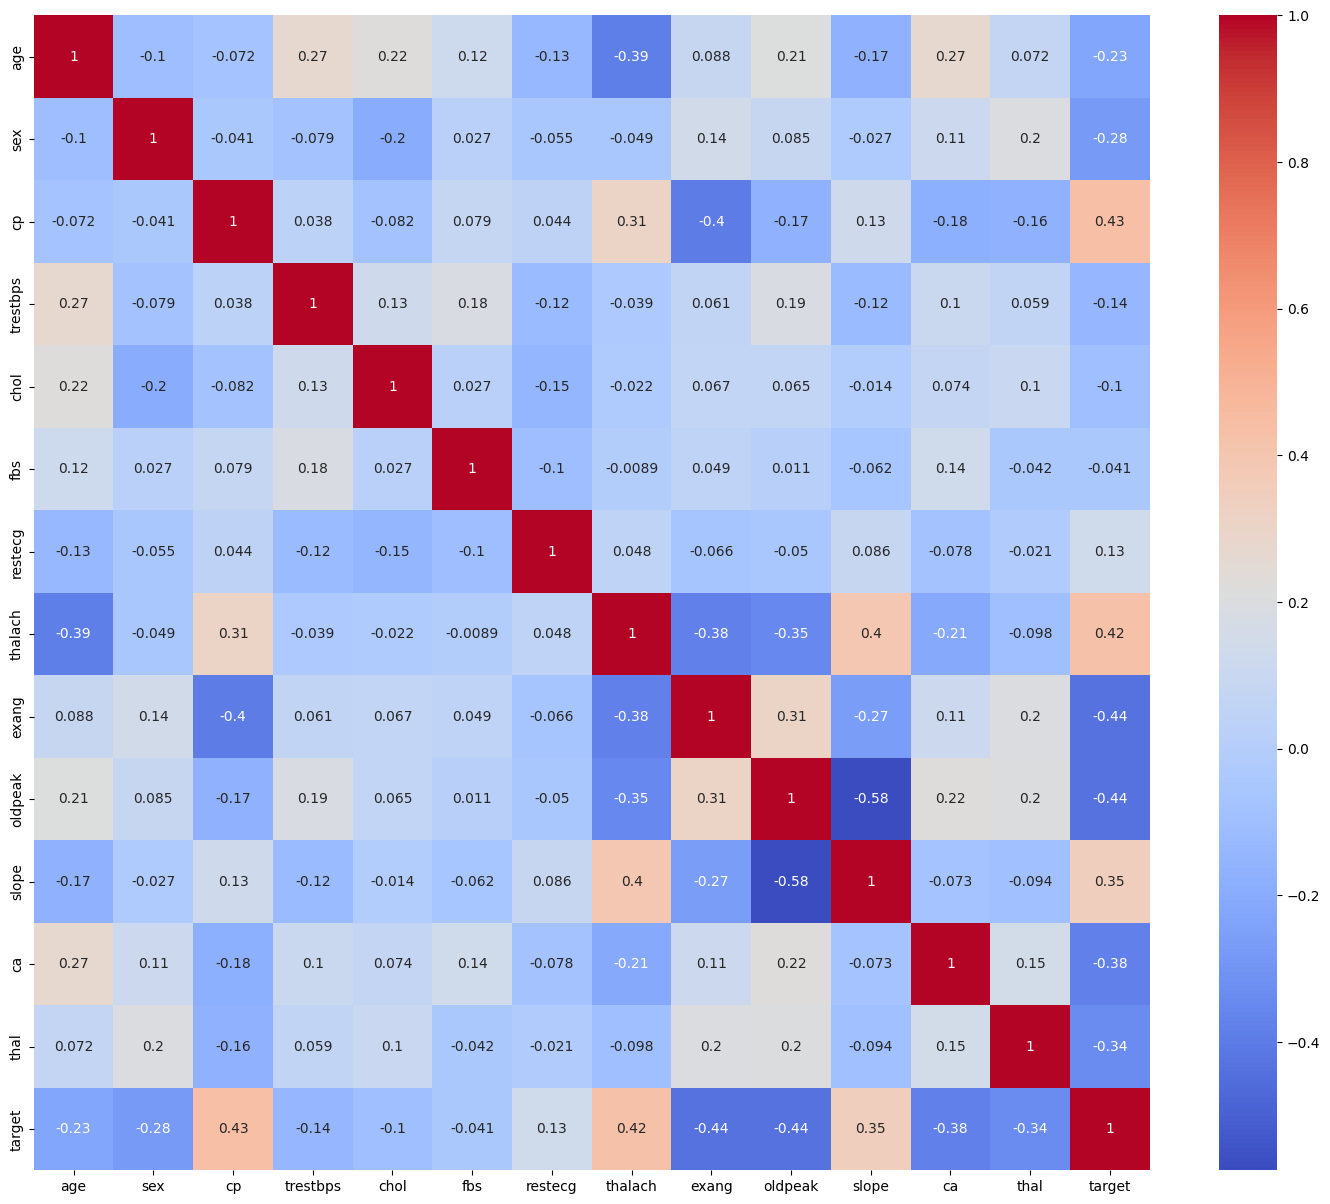

In [24]:
# Tamanho personalizado da figura
fig, ax = plt.subplots(figsize=(18, 15))

# Criando o mapa de calor usando seaborn
sns.heatmap(df_origem.corr(), annot=True, cmap='coolwarm',  ax=ax)

Podemos observar correlações positivas ou negativas, sendo classificadas como fortes ou fracas.
Para a identificação, observamos as variáveis x e y, sendo que quando há o aumento em x coincide com o aumento em y, enquanto a correlação é considerada negativa quando o aumento em x está associado à diminuição em y (e vice-versa).

No gráfico de correlação, uma faixa de valores é apresentada no lado direito. Valores mais próximos de 1 indicam uma correlação positiva forte (tons de vermelho), enquanto valores descendentes na faixa (representados em tons de azul) indicam uma correlação negativa, com valores mais baixos sugerindo uma correlação negativa forte.
As correlações fracas, ficarão mais próximas ao ponto central

No gráfico, os valores na transversal (vermelhos, com o número 1), indicam a correlação da variável com ela mesma. Observe o cruzamento entre o eixo X e Y.

Como exemplo, podemos citar:

* <i>Slope com Oldpeak</i> = correlação forte negativa
* <i>CP com Target</i> = correlação forte positiva

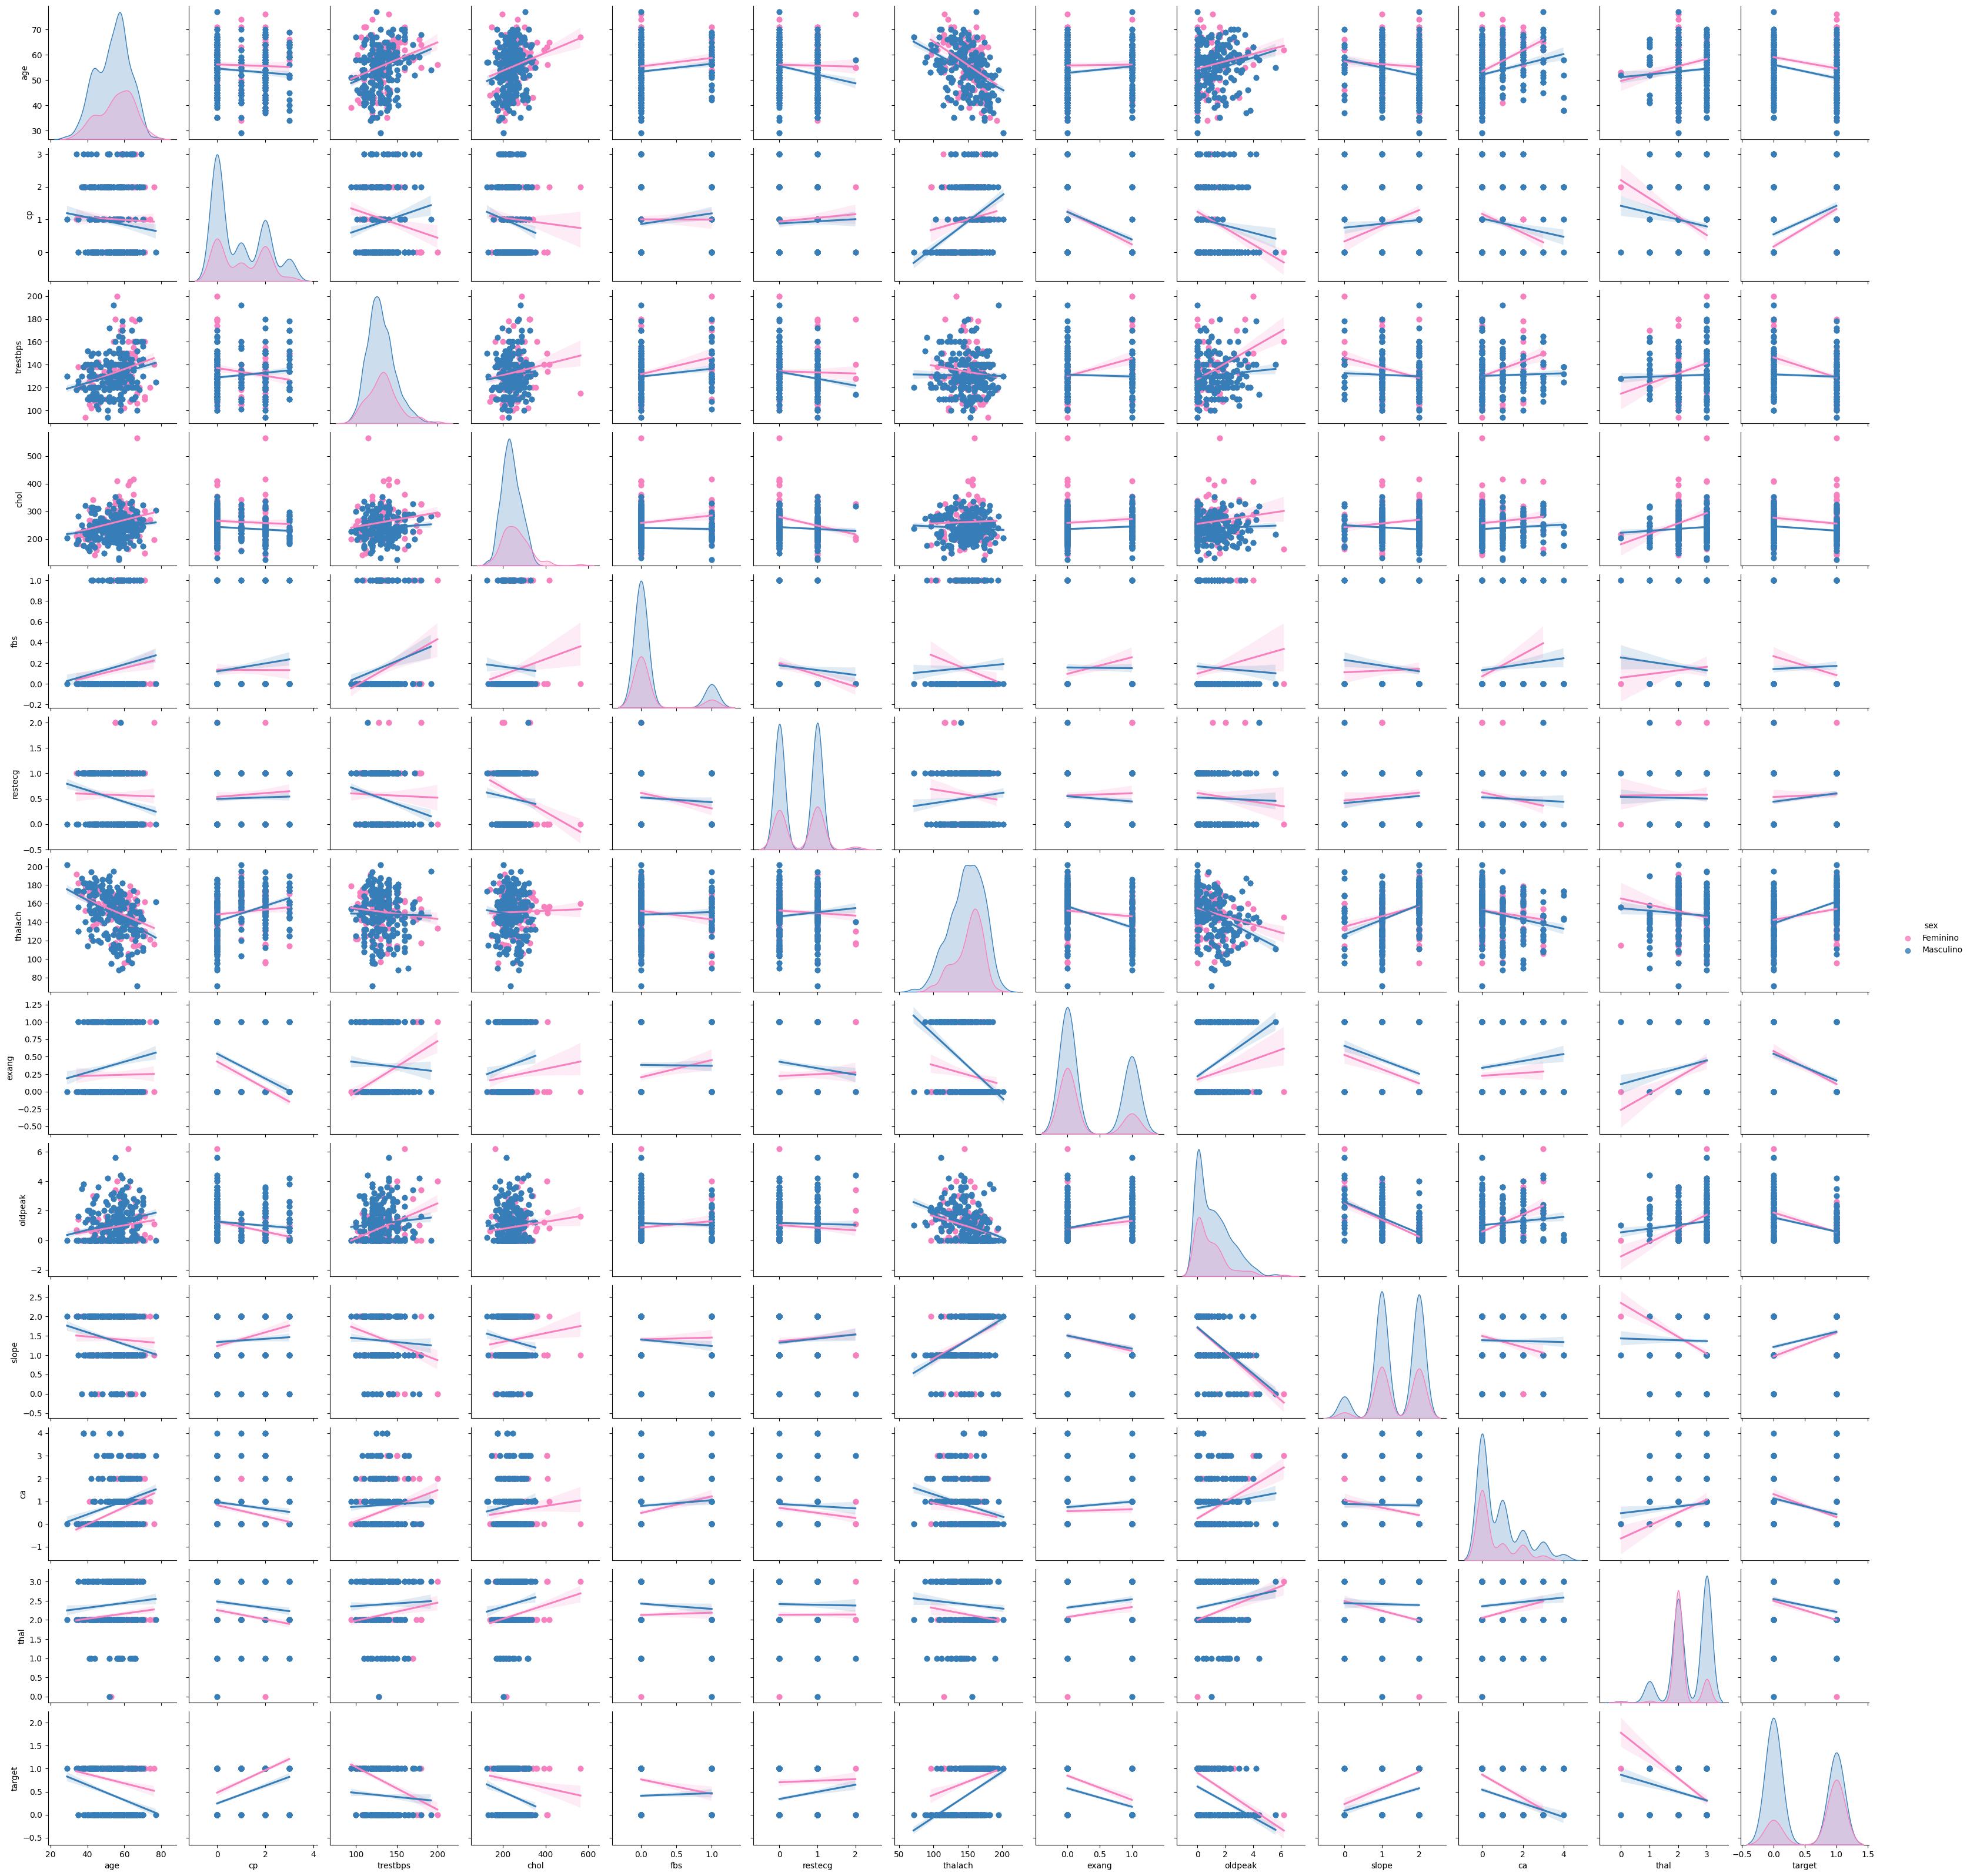

In [25]:
# pair plot com Seaborn
sns.pairplot(df, hue = "sex", hue_order=['Feminino','Masculino'] ,kind='reg', markers='o',
              palette=['#f781bf','#377eb8'])


O pairplot do Seaborn é uma ótima opção para gerar várias visualizações gráficas, a fim de comparar as variáveis.
No exemplo acima, houve a geração para todas as variáveis numéricas com o destaque para o gênero masculino (azul) ou feminino (rosa).

### 3.4. Gráficos Básicos para Apoiar a Análise de Dados


A elaboração de gráficos mais simples busca aprimorar a compreensão do público em geral. Desta maneira, é possível representar a contagem de elementos em categorias específicas, proporções e relações de forma mais acessível.
Serão apresentadas três construções gráficas, nas quais foram evidenciadas ora a quantidade ora a proporção, mantendo sempre a relação com o critério de gênero.

#### 3.4.1 - Gráfico de Barras

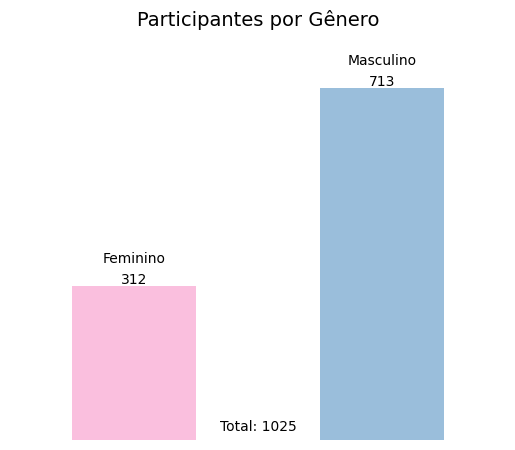

In [26]:
# Calcular a contagem total de participantes por gênero
total_participation = df.groupby('sex').size()

# Definir ordem correta das cores e rótulos
gender_order = ['Feminino', 'Masculino']
colors = ['#f781bf', '#377eb8']

# Plotar o gráfico de barras usando a ordem correta
ax = total_participation.loc[gender_order].plot(kind='bar', color=colors, legend=False, alpha=0.5)

# Adicionar rótulos nas barras
for p, gender in zip(ax.patches, gender_order):
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + p.get_width() / 2, y + height), ha='center',
                va='center', color='black', fontsize=10, xytext=(0, 5),
                textcoords='offset points')
    ax.annotate(f'{gender}', (x + p.get_width() / 2, y + height), ha='center',
                va='bottom', color='black', fontsize=10, xytext=(0, 15),
                textcoords='offset points')

# Adicionar a contagem total
ax.annotate(f'Total: {total_participation.sum()}', (0.5, 1.02), ha='center',
            va='center', color='black', fontsize=10, xytext=(0, 10),
            textcoords='offset points')

# Título
ax.set_title('Participantes por Gênero', y=1.1, fontsize=14)

# Ajustar a orientação da legenda do eixo x para horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Ocultar eixo x
ax.set_xticks([])
ax.set_xlabel('')

# Remover eixo y
ax.yaxis.set_visible(False)

# Removendo contornos em volta do gráfico
plt.box(False)

# Mostrar o gráfico
plt.show()


#### 3.4.2 - Gráfico de Barras Empilhadas



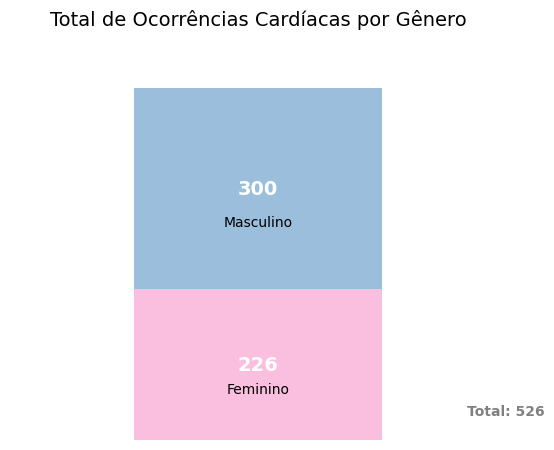

In [27]:

# DataFrame com registros de ocorrência = 1
df_target_1 = df[df['target'] == 1]

# Criar um DataFrame com a contagem total de ocorrências positivas
total_count = df_target_1.shape[0]

# Converter a coluna 'sex' em uma categoria ordenada
df['sex'] = pd.Categorical(df['sex'], categories=['Feminino', 'Masculino'],
                            ordered=True)

# Criar uma tabela pivô
df_pivot = df_target_1.pivot_table(index='target', columns='sex', aggfunc='size',
                                   fill_value=0)

# Cores personalizadas para cada espaço da barra
colors = {'Masculino': '#377eb8', 'Feminino': '#f781bf'}

# Plotar o gráfico de barras empilhadas com cores personalizadas
ax = df_pivot.plot(kind='bar', stacked=True,
                   color=[colors[col] for col in df_pivot.columns],
                   legend=False, alpha=0.5)

# Adicionar rótulos nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center',
                va='center', color='white', fontsize=14, fontweight='bold' )

# Adicionar rótulos Masculino e Feminino abaixo de cada barra
for label, rect in zip(df_pivot.columns, ax.patches):
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.annotate(label, (x + width/2, y + height/3), ha='center', va='center',
                color='black', fontsize=10, xytext=(0, 0.1),
                textcoords='offset points')

# Adicionar a contagem total geral
ax.annotate(f'Total: {total_count}', (0.5, 1.15), ha='center', va='center',
            color='gray', fontsize=10, xytext=(0, 20), fontweight='bold',
            textcoords='offset points')

# Posicionando o Título
ax.set_title('Total de Ocorrências Cardíacas por Gênero', y=1.1, fontsize=14)

# Remover eixo y
ax.yaxis.set_visible(False)

# Ocultar eixo x
ax.set_xticks([])
ax.set_xlabel('')

# Removendo contornos em volta do gráfico
plt.box(False)

# Mostrar o gráfico
plt.show()


#### 3.4.3 Gráfico de Pizza

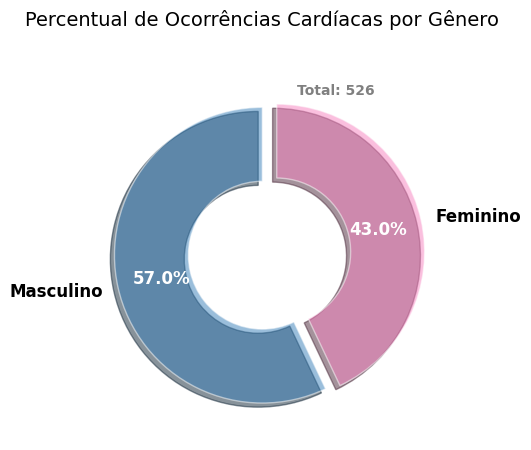

In [28]:
# Criar um DataFrame com a contagem total de ocorrências positivas
total_count = df_target_1.shape[0]

# Calcular o percentual de cada sexo
percentages = df_target_1['sex'].value_counts(normalize=True) * 100

# Cores personalizadas para cada setor da pizza
colors = ['#377eb8', '#f781bf']

destaques = [0, 0.1]

# Plotar o gráfico de pizza
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(percentages, labels=percentages.index,
                                  autopct='%1.1f%%', explode=destaques,
                                  shadow=True, pctdistance=0.70, colors=colors,
                                  textprops=dict(fontsize=12, color='white',
                                  fontweight='bold'), startangle=90,
                                  wedgeprops=dict(width=0.5, edgecolor='w'))

# Adicionar a contagem total geral
ax.annotate(f'Total: {total_count}', (0.5, 1.02), ha='center', va='center',
            color='gray', fontsize=10, xytext=(0, 10), fontweight='bold',
            textcoords='offset points')

# Ajustar a transparência dos setores
for wedge in wedges:
    wedge.set_alpha(0.5)

# Adicionar rótulos dos gêneros nas fatias (com cor preta)
for text, label in zip(texts, percentages.index):
    text.set_text(label)
    text.set_color('black')

# Adicionar rótulos dos percentuais nas fatias (com cor branca)
for autotext, percentage in zip(autotexts, percentages):
    autotext.set_text(f'{percentage:.1f}%')
    autotext.set_color('white')

# Posicionar o título
title = ax.set_title('Percentual de Ocorrências Cardíacas por Gênero', y=1.1,
                     fontsize=14)

# Remover rótulo do eixo y
ax.yaxis.set_visible(False)

# Mostrar o gráfico
plt.show()


## 4. Pré-Processamento de dados

Nesta etapa, podem ser realizadas diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection).
Os processos de padronização ou normalização não serão realizados nesta etapa (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Transformando Dados Categóricos em numéricos

A base original (df_original) possuia todas as variáveis como numéricas.
Para conseguir exemplificar o uso de gráficos simples, fiz uma transformação da coluna 'sex', modificando os valores 1 para Masculino e 0 para Feminino.
Agora, realizarei o processo de retornar os valores numéricos, já que modelos matemáticos não processam valores em string.

In [29]:
# Contando os registros para cada variável categórica em 'sex'
df.sex.value_counts()

Masculino    713
Feminino     312
Name: sex, dtype: int64

Inicialmente, vamos analisar a contagem da variável categórica.
Vemos que temos 713 registros com o valor 'Masculino' e 312 para o valor 'Feminino'

In [30]:
#Criando uma nova coluna para representar a variável categórica sex
df['is_male']=df.sex.apply(lambda x: 1 if x =='Masculino' else 0)

In [31]:
#Visualizando o dataframe com a nova coluna e valores atribuídos em realção a coluna 'sex'
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,is_male
0,52,Masculino,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,Masculino,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,Masculino,0,145,174,0,1,125,1,2.6,0,0,3,0,1
3,61,Masculino,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,Feminino,0,138,294,1,1,106,0,1.9,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Masculino,1,140,221,0,1,164,1,0.0,2,0,2,1,1
1021,60,Masculino,0,125,258,0,0,141,1,2.8,1,1,3,0,1
1022,47,Masculino,0,110,275,0,0,118,1,1.0,1,1,2,0,1
1023,50,Feminino,0,110,254,0,0,159,0,0.0,2,0,2,1,0


In [32]:
#fazendo um agrupamento para validar se a nova coluna 'is_male'
df[['sex', 'is_male']].value_counts()

sex        is_male
Masculino  1          713
Feminino   0          312
dtype: int64

Agora que a validação foi comprovada, podemos eliminar a coluna 'sex', já que 'sex' e 'is_male' representam uma redundância

In [33]:
#Excluindo a coluna sex
df = df.drop('sex', axis=1)

In [34]:
#visualizando somente o nome das colunas
df.head(0)

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,is_male


Lembrando que essa é apenas uma das formas de transformação de dados categoricos.
Poderíamos ter utilizado o replace, ou One Hot Enconding, assim como Dummy .
Se a variável tívesse um ordenação lógica, a técnica utilizada seria a discretização, que consiste em transformar um atributo contínuo em categorias ordinais.

### 4.2. Tratamento de Missings e Limpeza

In [35]:
# verificando nulls no dataset
df.isnull().sum()

age         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
is_male     0
dtype: int64

Como já descrito, não há presença de missings, visualmente, entretanto, a variável "Thal" tem presença de valores zero preenchidos, de forma incorreta. Dessa maniera,  caberá uma ação sobre esses valores zerados, que constam no atributo "Thal", que serão preenchidos com a mediana.

In [36]:
# Salvando um novo dataset para tratamento dos missings

#recuperando o nome das colunas
col = list(df.columns)

#novo dataset com todas as colunas do datasetoriginal
dataset_sem_missings=df[col[:]]


In [37]:
#Substituir 0 por Nan
dataset_sem_missings.replace(0,np.nan, inplace=True)

In [38]:
# Substituir 0 por NaN apenas na coluna 'Thal'
dataset_sem_missings['thal'].replace(0, pd.NA, inplace=True)

# verificando valores missing em 'thal'
print(dataset_sem_missings.isna().sum())

age           0
cp          497
trestbps      0
chol          0
fbs         872
restecg     497
thalach       0
exang       680
oldpeak     329
slope        74
ca          578
thal          7
target      499
is_male     312
dtype: int64


<Axes: >

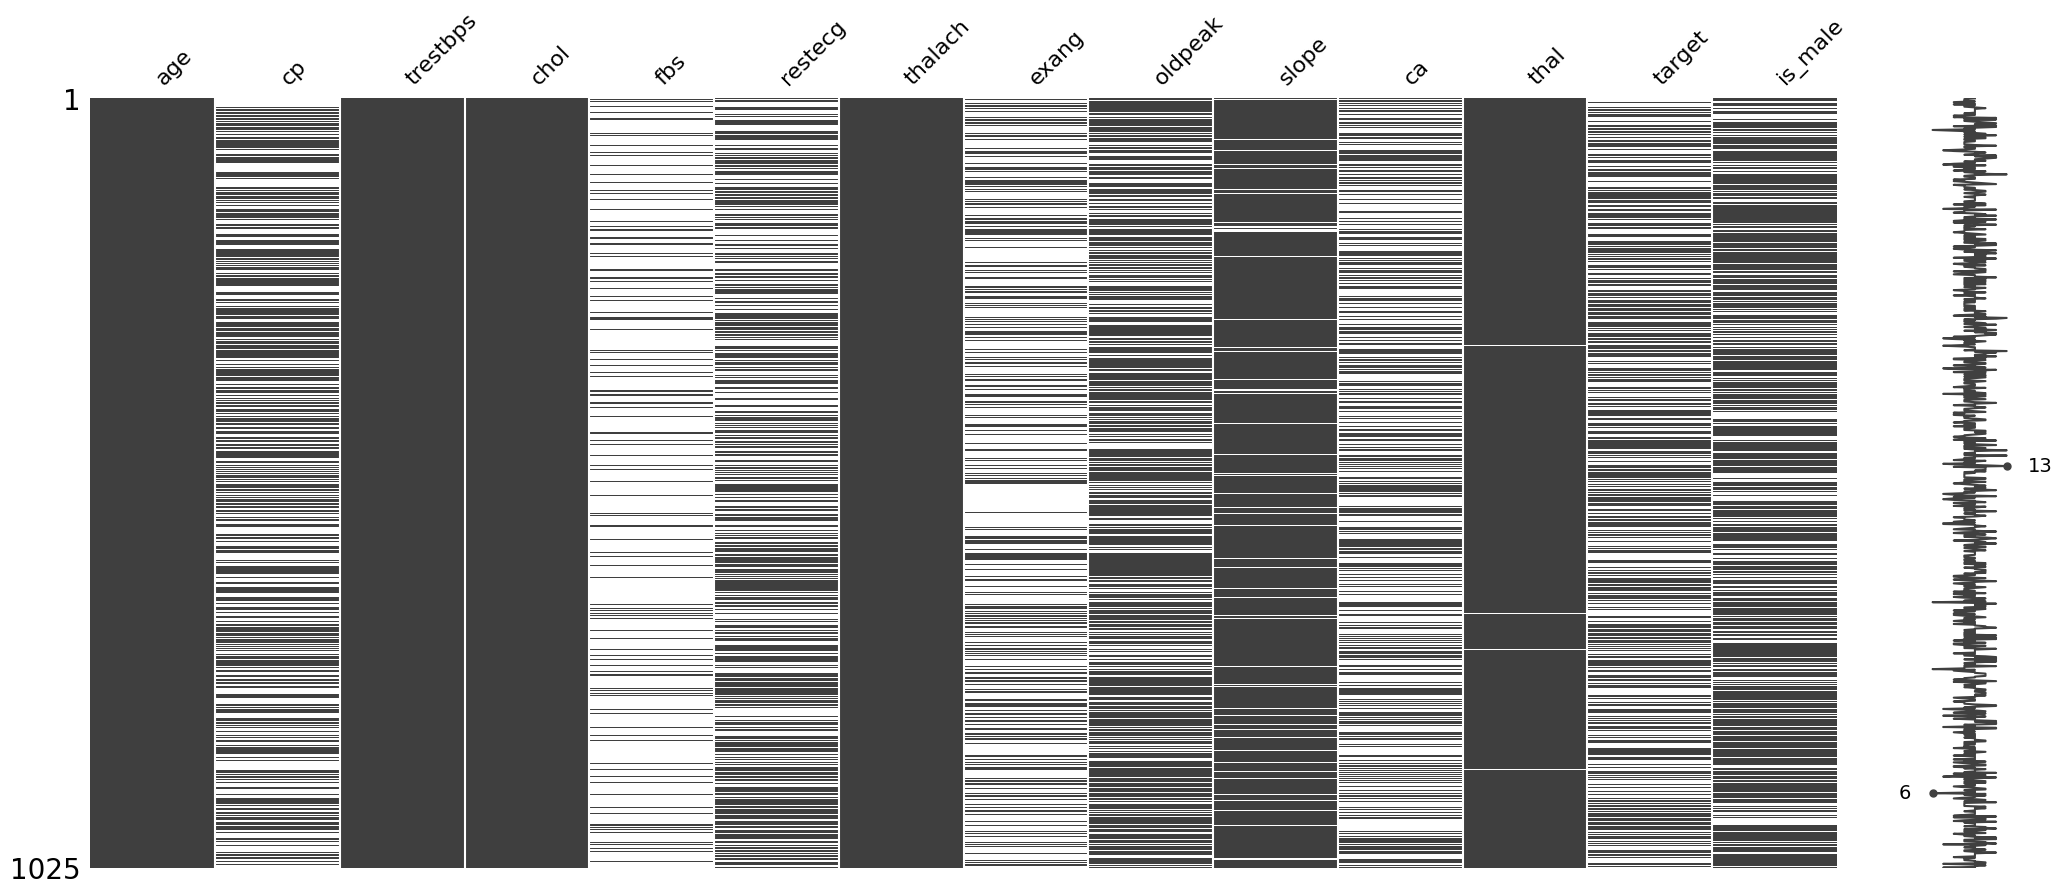

In [39]:
#exibindo a visualização matricial da nulidade do dataset
ms.matrix(dataset_sem_missings)

Conforme demonstrado, podemos observar linhas em branco, dentro da coluna 'thal', isso indica os registros nulos. Há apenas 7 registros com valores faltantes, representando 0,68% das linhas do dataframe.
Neste caso, vamos optar pela remoção desses registros (linhas).

In [40]:
# Removendo linhas com missing
dataset_sem_missings = dataset_sem_missings.dropna(subset=['thal'])

Se não quiser separar as medianas conforme o gênero, poderia ser utilizado o comando abaixo

dataset_sem_missings['thal'].fillna(dataset_sem_missings['thal'].median(), inplace=True)

<Axes: >

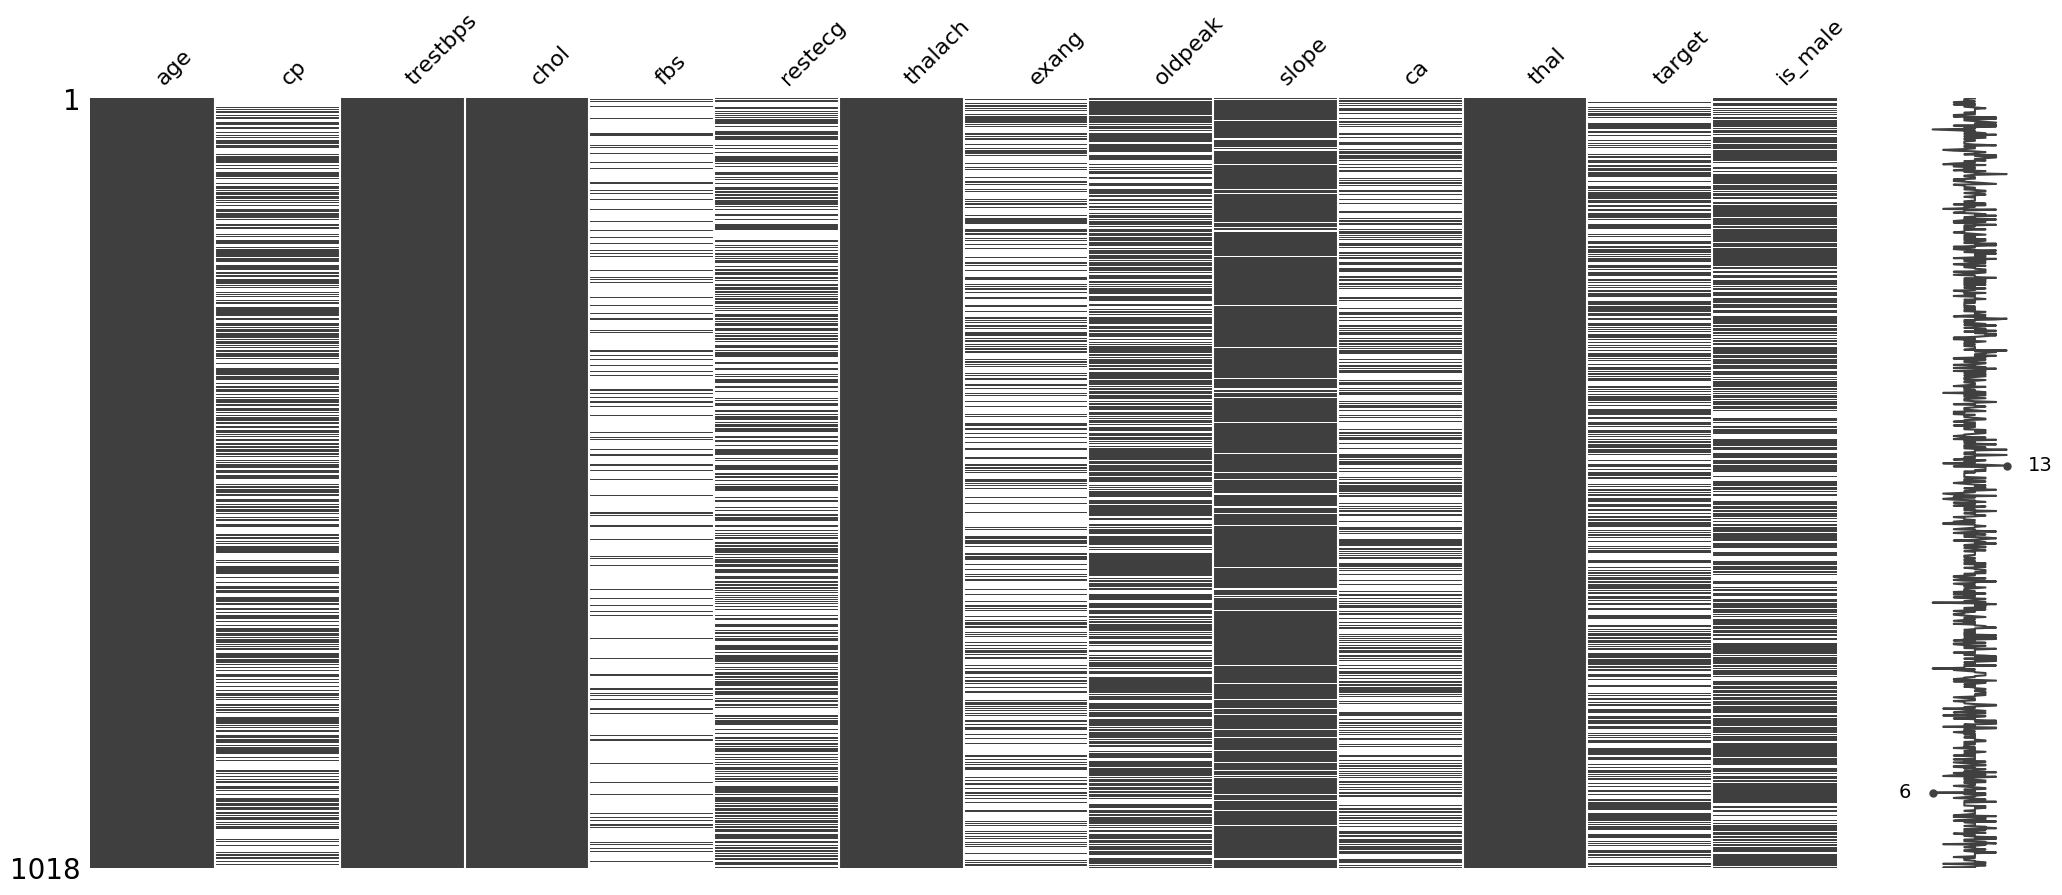

In [41]:
#exibindo a visualização matricial da nulidade do dataset
ms.matrix(dataset_sem_missings)

In [42]:
# verificando nulls no dataset
dataset_sem_missings.isnull().sum()

age           0
cp          493
trestbps      0
chol          0
fbs         869
restecg     494
thalach       0
exang       677
oldpeak     326
slope        74
ca          571
thal          0
target      495
is_male     309
dtype: int64

### 4.3 Separação do Dataset em Treino/Teste e Normalização

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Neste modelo, 70% do conjunto de dados será utilizado para modelagem e 30% para teste, usando a estratégia train-test-split. Primeiramente, serão sinalizados quais são as colunas de atributos (X) e qual é a coluna das classes (Y). Em seguida, especificará o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, haverá a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

#### 4.3.1 Split do Dataset

In [43]:
dataset_sem_missings.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,is_male
0,52,NaN,125,212,NaN,1.0,168,NaN,1.0,2.0,2.0,3.0,NaN,1
1,53,NaN,140,203,1.0,NaN,155,1.0,3.1,NaN,NaN,3.0,NaN,1
2,70,NaN,145,174,NaN,1.0,125,1.0,2.6,NaN,NaN,3.0,NaN,1
3,61,NaN,148,203,NaN,1.0,161,NaN,NaN,2.0,1.0,3.0,NaN,1
4,62,NaN,138,294,1.0,1.0,106,NaN,1.9,1.0,3.0,2.0,NaN,NaN


In [44]:
# Montar um DataFrame de atributos básicos, excluindo a coluna alvo 'target'
X = dataset_sem_missings.drop('target', axis=1)

# Montar um DataFrame com apenas a coluna alvo 'target'
y = dataset_sem_missings['target']

In [45]:
# Dividir dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualização X_train
print("Conjunto de Treino (X):")
print(X_train.head())

# Visualização y_train
print("\nConjunto de Treino (y):")
print(y_train.head())

# Visualização X_test
print("\nConjunto de Teste (X):")
print(X_test.head())

# Visualização y_test
print("\nConjunto de Teste (y):")
print(y_test.head())


Conjunto de Treino (X):
     age   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
539   64  3.0       170   227  NaN      NaN      155    NaN      0.6    1.0   
817   45  NaN       115   260  NaN      NaN      185    NaN      NaN    2.0   
178   44  NaN       110   197  NaN      NaN      177    NaN      NaN    2.0   
794   61  3.0       134   234  NaN      1.0      145    NaN      2.6    1.0   
385   51  2.0       110   175  NaN      1.0      123    NaN      0.6    2.0   

      ca  thal is_male  
539  NaN   3.0       1  
817  NaN   2.0       1  
178  1.0   2.0       1  
794  2.0   2.0       1  
385  NaN   2.0       1  

Conjunto de Treino (y):
539    1.0
817    1.0
178    NaN
794    NaN
385    1.0
Name: target, dtype: float64

Conjunto de Teste (X):
     age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
532   63 NaN       124   197  NaN      1.0      136    1.0      NaN    1.0   
921   58 NaN       146   218  NaN      1.0      105    NaN    

#### 4.3.2 Normalização

Em análises estatísticas, normalização é frequentemente utilizada quando os dados não seguem uma distribuição normal (gaussiana). A normalização estatística busca transformar os dados de modo que eles se aproximem mais de uma distribuição normal, o que pode ser importante para certas técnicas estatísticas, como testes de hipóteses paramétricos.
Neste modelo, vimos que não há uma distribuição normal, sendo assim, a técnica de Normalização será aplicada, para os conjuntos X.

In [46]:
# Normalização

# Definindo o transformador como min max scaler
scaler = MinMaxScaler()

# Transformando os dados
scaledX_train = scaler.fit_transform(X_train)

# Transformando os dados
scaledX_test = scaler.fit_transform(X_test)

# Exibindo os dados transformados
print("Dados Originais:\n\n", X.values)
print("Dados Normalizados:\n\n", scaledX_train)

Dados Originais:

 [[ 52.  nan 125. ...   2.   3.   1.]
 [ 53.  nan 140. ...  nan   3.   1.]
 [ 70.  nan 145. ...  nan   3.   1.]
 ...
 [ 47.  nan 110. ...   1.   2.   1.]
 [ 50.  nan 110. ...  nan   2.  nan]
 [ 54.  nan 120. ...   1.   3.   1.]]
Dados Normalizados:

 [[0.72916667 1.         0.71698113 ...        nan 1.         0.        ]
 [0.33333333        nan 0.19811321 ...        nan 0.5        0.        ]
 [0.3125            nan 0.1509434  ... 0.         0.5        0.        ]
 ...
 [0.25       0.5        0.16981132 ...        nan 0.5        0.        ]
 [0.60416667 0.         0.24528302 ...        nan 0.5        0.        ]
 [0.375      0.5        0.41509434 ...        nan 0.5        0.        ]]


Este MVP proporcionou a elaboração de etapas essenciais na construção de Modelos de Machine Learning. Em resumo, pode-se dizer:

1. O pré-processamento de dados desempenha um papel crucial no ciclo de vida de um projeto de análise de dados e modelagem. Ele engloba uma série de técnicas que visam preparar e organizar os dados brutos para análise. Este procedimento inclui desde a limpeza e tratamento de valores ausentes até a normalização e transformação de variáveis, garantindo que os dados estejam em um formato adequado para a construção de modelos.

2. Uma etapa essencial no pré-processamento é a separação do conjunto de dados em conjuntos de treino e teste. Essa prática é fundamental para avaliar o desempenho do modelo de forma objetiva. Ao reservar uma parte dos dados exclusivamente para teste, podemos simular como o modelo se comportará em situações do mundo real, fornecendo uma medida confiável de sua capacidade preditiva.

A separação do conjunto em treino e teste ajuda a evitar problemas como overfitting, onde o modelo se adapta excessivamente aos dados de treinamento e tem dificuldade em generalizar para novos dados. Além disso, fornece uma estimativa realista da performance do modelo em um ambiente de produção.

Em resumo, o pré-processamento de dados e a correta separação em conjuntos de treino e teste são aspectos fundamentais para o sucesso de qualquer projeto de análise de dados e modelagem. Essas práticas contribuem significativamente para a construção de modelos mais robustos, capazes de lidar com dados do mundo real e gerar previsões precisas e confiáveis.




